Wine classification - Wine Quality Prediction

In [ ]:
# import libraries


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

import scipy
import warnings

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

warnings.filterwarnings('ignore')

In [6]:
# get data

dataframe = pd.read_csv("WineQT.csv")
dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [7]:
list(dataframe.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'Id']

Data Exploration

In [16]:
df = dataframe[dataframe.columns]
cm = sns.light_palette("green", as_cmap=True)
df.head(30).style.background_gradient(cmap=cm)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5,1
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5,2
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6,3
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,4
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5,5
6,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,5,6
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,7,7
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,7,8
9,6.700000,0.580000,0.080000,1.800000,0.097000,15.000000,65.000000,0.995900,3.280000,0.540000,9.200000,5,10


In [18]:
dataframe[dataframe.quality == 3].head(5).style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
324,11.600000,0.580000,0.660000,2.200000,0.074000,10.000000,47.000000,1.000800,3.250000,0.570000,9.000000,3,459
368,10.400000,0.610000,0.490000,2.100000,0.200000,5.000000,16.000000,0.999400,3.160000,0.630000,8.400000,3,517
922,7.600000,1.580000,0.000000,2.100000,0.137000,5.000000,9.000000,0.994760,3.500000,0.400000,10.900000,3,1299
1046,7.300000,0.980000,0.050000,2.100000,0.061000,20.000000,49.000000,0.997050,3.310000,0.550000,9.700000,3,1469
1055,7.100000,0.875000,0.050000,5.700000,0.082000,3.000000,14.000000,0.998080,3.400000,0.520000,10.200000,3,1478


In [19]:
dataframe[dataframe.quality == 4].head(5).style.background_gradient(cmap=sns.light_palette("orange", as_cmap=True))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
29,8.800000,0.610000,0.300000,2.800000,0.088000,17.000000,46.000000,0.997600,3.260000,0.510000,9.300000,4,41
32,4.600000,0.520000,0.150000,2.100000,0.054000,8.000000,65.000000,0.993400,3.900000,0.560000,13.100000,4,45
50,8.300000,0.675000,0.260000,2.100000,0.084000,11.000000,43.000000,0.997600,3.310000,0.530000,9.200000,4,73
54,8.300000,0.625000,0.200000,1.500000,0.080000,27.000000,119.000000,0.997200,3.160000,1.120000,9.100000,4,79
66,5.000000,1.020000,0.040000,1.400000,0.045000,41.000000,85.000000,0.993800,3.750000,0.480000,10.500000,4,94


In [20]:
dataframe[dataframe.quality == 5].head(5).style.background_gradient(cmap=sns.light_palette("yellow", as_cmap=True))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5,1
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5,2
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,4
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5,5


In [21]:
dataframe[dataframe.quality == 6].head(5).style.background_gradient(cmap=sns.light_palette("blue", as_cmap=True))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6,3
13,7.900000,0.320000,0.510000,1.800000,0.341000,17.000000,56.000000,0.996900,3.040000,1.080000,9.200000,6,19
17,6.900000,0.400000,0.140000,2.400000,0.085000,21.000000,40.000000,0.996800,3.430000,0.630000,9.700000,6,24
21,7.800000,0.645000,0.000000,2.000000,0.082000,8.000000,16.000000,0.996400,3.380000,0.590000,9.800000,6,29
25,7.800000,0.645000,0.000000,5.500000,0.086000,5.000000,18.000000,0.998600,3.400000,0.550000,9.600000,6,35


In [22]:
dataframe[dataframe.quality == 7].head(5).style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,7,7
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,7,8
12,8.500000,0.280000,0.560000,1.800000,0.092000,35.000000,103.000000,0.996900,3.300000,0.750000,10.500000,7,16
27,8.100000,0.380000,0.280000,2.100000,0.066000,13.000000,30.000000,0.996800,3.230000,0.730000,9.700000,7,37
89,8.000000,0.590000,0.160000,1.800000,0.065000,3.000000,16.000000,0.996200,3.420000,0.920000,10.500000,7,128


Dataset - infor

In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


NULL Values in the dataset

In [13]:
pd.DataFrame(dataframe.isnull().sum(), columns=["total"])

,total
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [14]:
pd.DataFrame(dataframe.nunique().sort_values(), columns=["Value"])

,Value
quality,6
free sulfur dioxide,53
alcohol,61
citric acid,77
residual sugar,80
pH,87
sulphates,89
fixed acidity,91
chlorides,131
volatile acidity,135


Explortory Data Analysis

In [23]:
total ={}
for value in dataframe.quality:
    if value not in total:
        total[value] = 0
        total[value] += 1

In [24]:
features = df.columns
features = features[0: len(df.columns)-2]
print(f"Total features : {len(features)}")

Total features : 11


In [25]:
import random

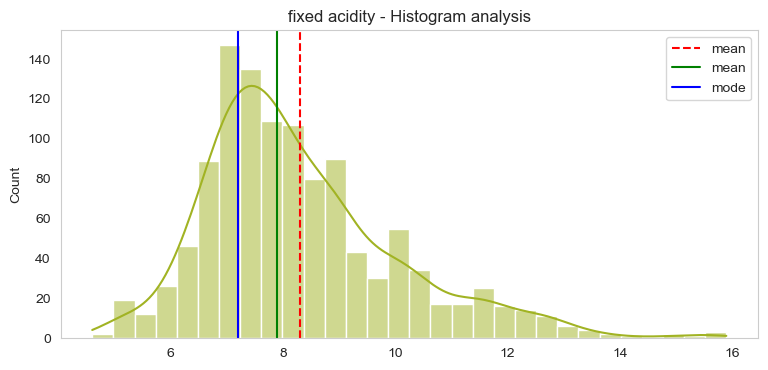

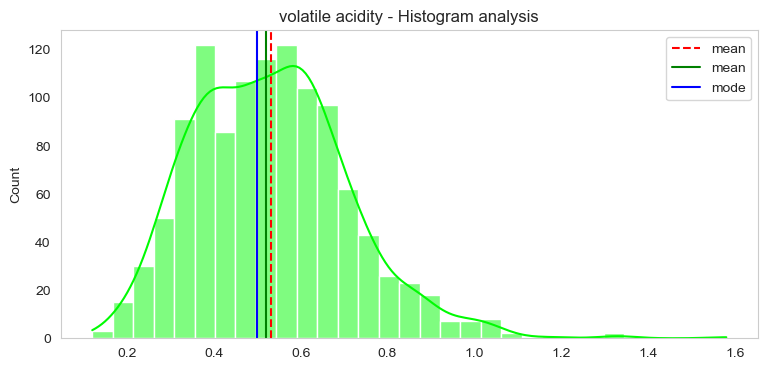

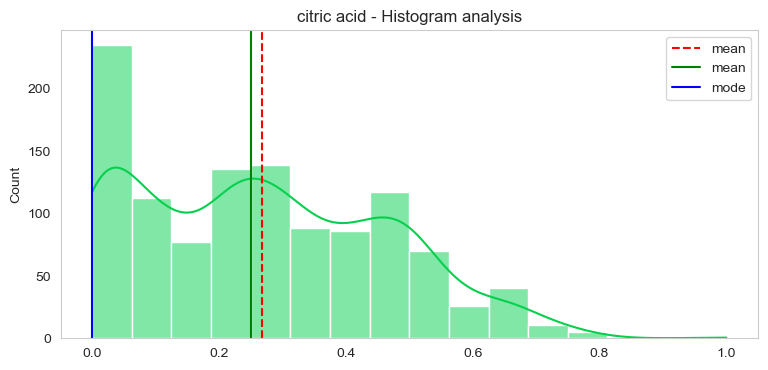

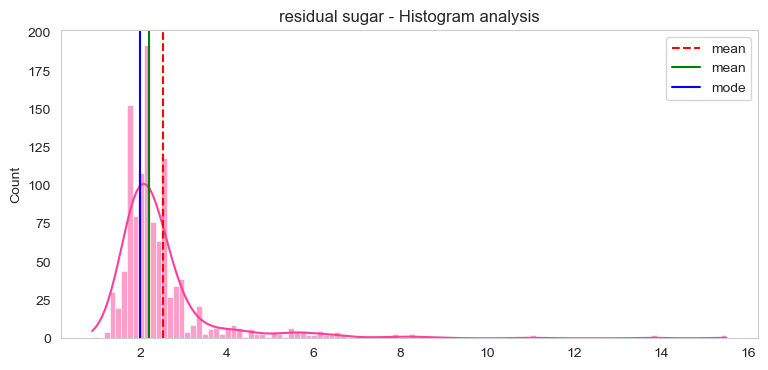

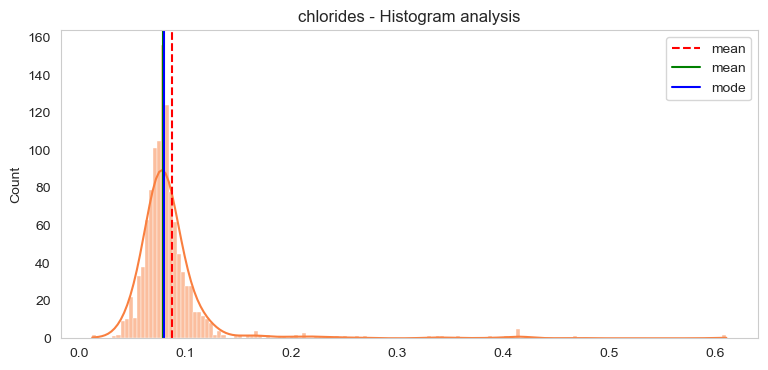

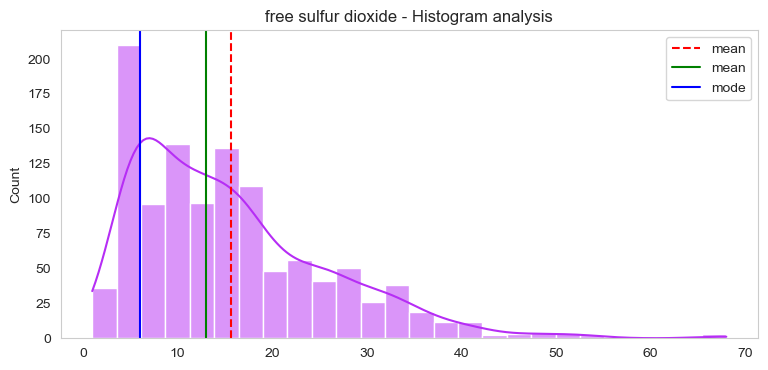

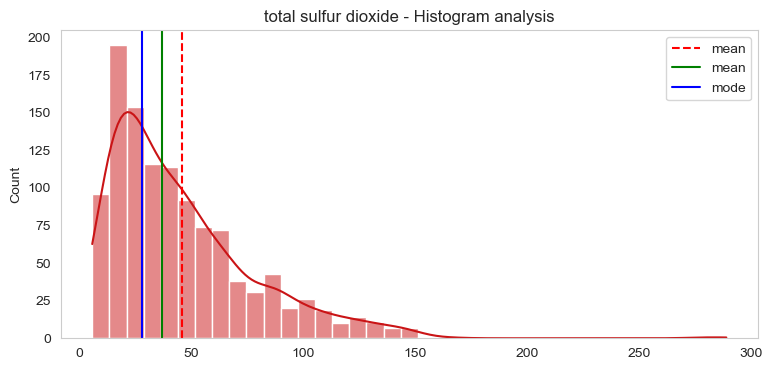

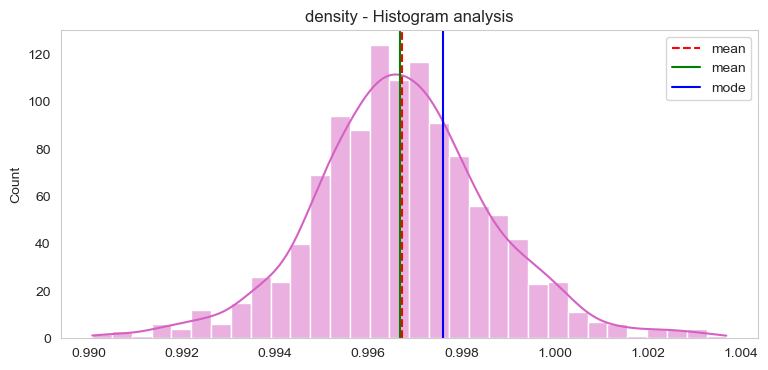

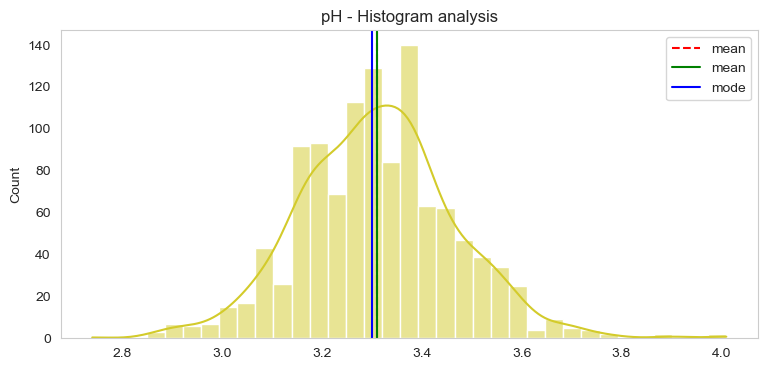

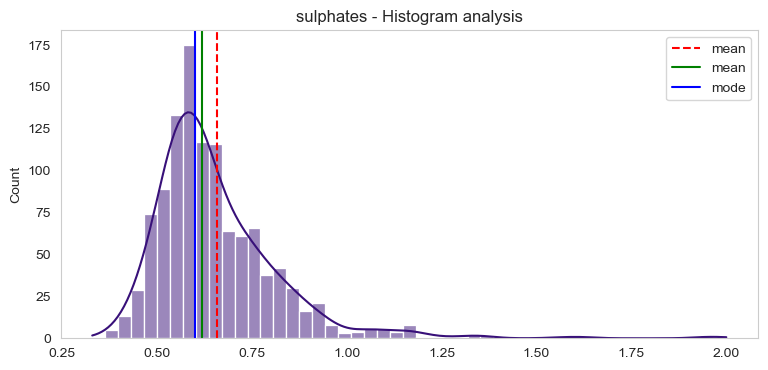

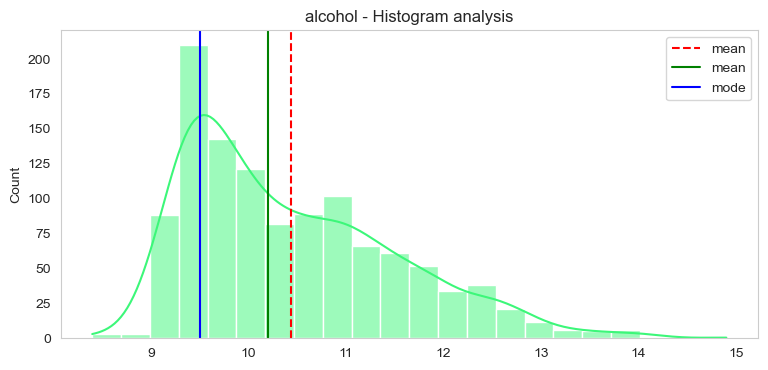

In [30]:
def get_random_color():
    r1 = lambda: random.randint(0,255)
    return'#%02X%02X%02X' % (r1(), r1(), r1())

def get_histplot_central_tendency(df: dict, fields: list):
    for field in fields:
        f, (ax1) = plt.subplots(1, 1, figsize=(9, 4))
        v_dist_1 = df[field].values
        sns.histplot(v_dist_1, ax=ax1, color=get_random_color(), kde=True)

        mean = df[field].mean()
        median = df[field]. median()
        mode = df[field].mode().values[0]

        ax1.axvline(mean, color= 'r', linestyle='--', label="mean")
        ax1.axvline(median, color='g', linestyle='-', label="mean")
        ax1.axvline(mode, color='b', linestyle='-', label='mode')

        ax1.legend()
        plt.grid()
        plt.title(f"{field} - Histogram analysis")

get_histplot_central_tendency(dataframe, features)        



In [33]:
values = [vl for vl in total.values()]
names = [nm for nm in total]

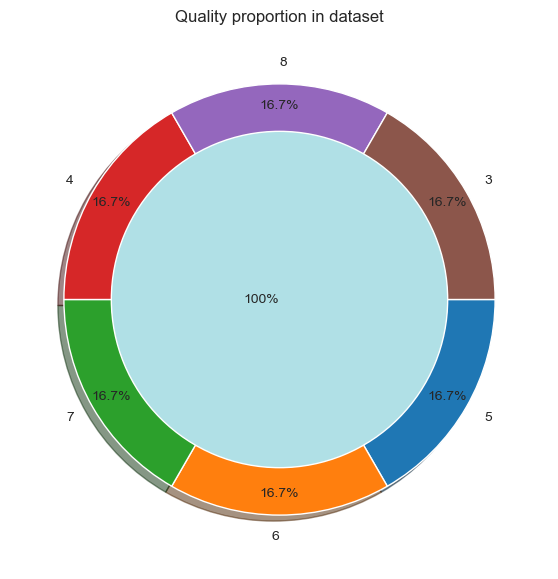

In [36]:
plt.figure(figsize=(7, 7))
plt.pie([values][0], radius= 1, shadow=True, 
        labels=[names][0], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0,0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.title("Quality proportion in dataset")
plt.show()

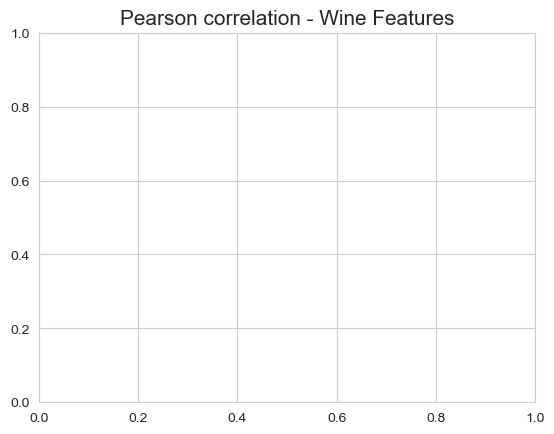

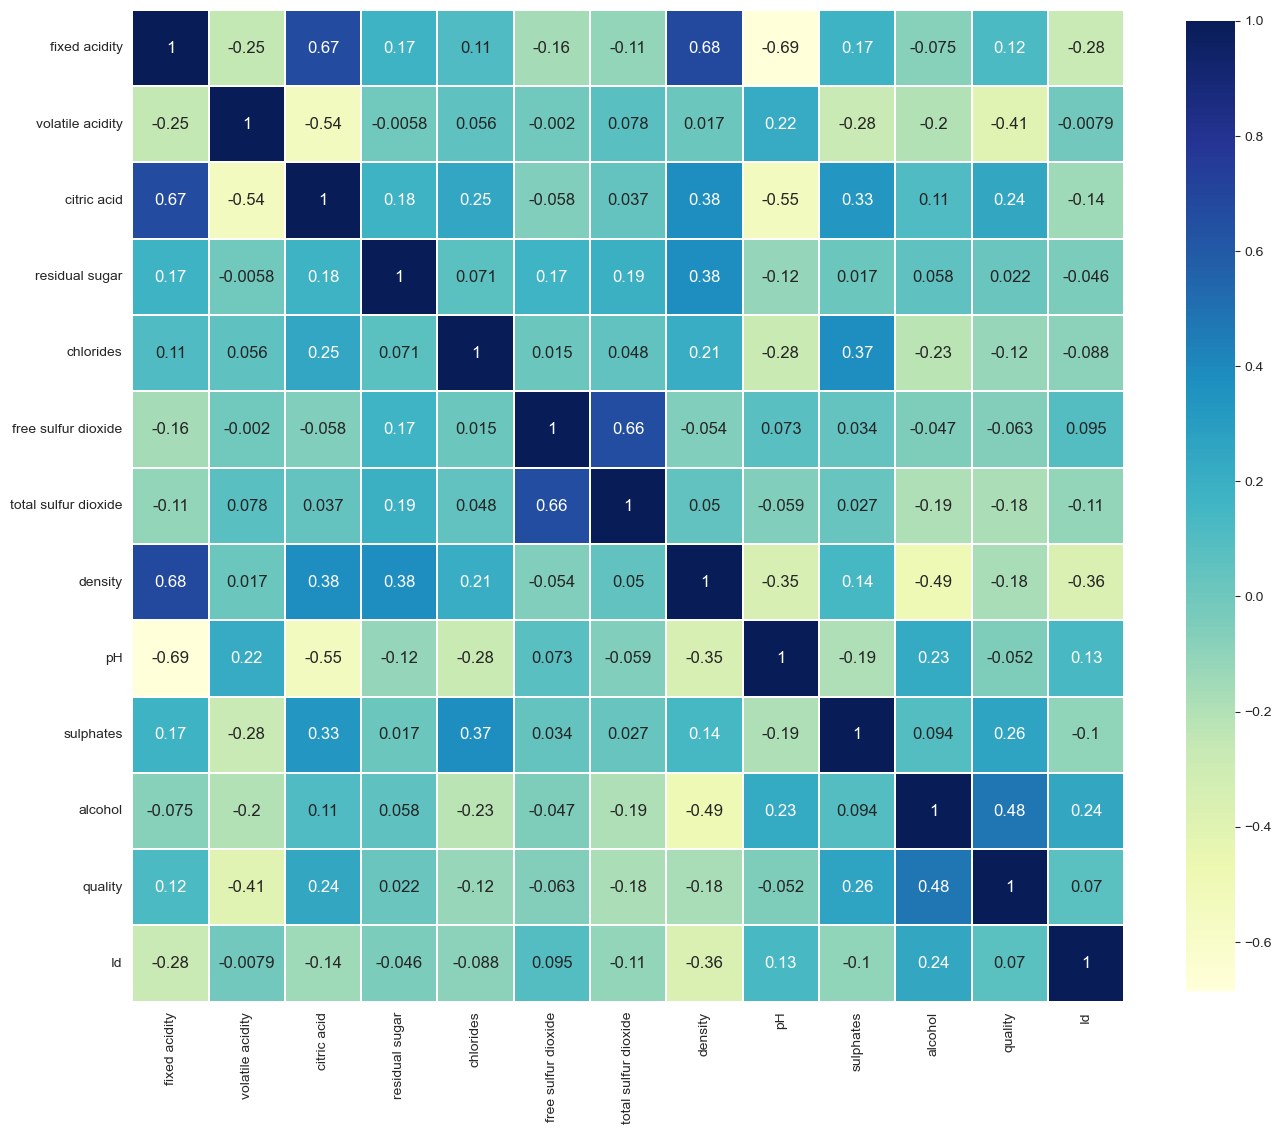

In [47]:
def get_correlation_heatmap(df):
    fig, ax = plt.subplots(figsize=(16, 14))

    fig = sns.heatmap(
        df.corr(), 
        cmap="YlGnBu",
        square=True ,
        cbar_kws={'shrink' :.9},
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white', annot_kws={'fontsize' : 12}
        )
    
plt.title('Pearson correlation - Wine Features', size=15)

get_correlation_heatmap(dataframe)
   

Modeling

In [48]:
print(f'Checking null values of the given dataset: \n{df.isnull().sum()}')

Checking null values of the given dataset: 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [50]:
X = dataframe[features]
y = dataframe["quality"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(f"Training {X_train.shape}, Test {X_test.shape}")

Training (914, 11), Test (229, 11)


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print('Train dataset after scaler')
pd.DataFrame(X_train).head(10).style.background_gradient(cmap= sns.light_palette("blue", as_cmap=True))

Train dataset after scaler


,0,1,2,3,4,5,6,7,8,9,10
0,-0.414850,-1.347078,1.135342,0.135131,0.096749,0.951419,0.469287,0.183437,0.008677,-0.279355,-0.300013
1,-0.644512,0.652798,-1.252517,-0.167311,0.138619,-1.036458,-0.452149,1.334202,2.329768,0.849373,-0.674939
2,0.274137,0.430590,-0.388823,1.118070,0.138619,1.448388,0.755250,0.586204,-0.571596,-0.932829,-0.393745
3,-0.587096,0.708350,-1.354128,-0.394143,-0.070730,-0.937064,-0.706338,0.811127,1.942919,1.799881,-0.487476
4,0.274137,0.930559,-1.354128,-0.620975,-0.384752,-0.738276,-0.833433,0.136360,0.008677,-0.754609,-0.393745
5,-0.012940,0.263933,-0.693656,0.286353,0.180489,-0.141914,0.564608,0.863434,-0.893970,-0.219948,-1.237329
6,0.446384,1.263872,2.100646,-0.620975,6.837770,0.255662,0.596382,-0.119947,-2.634788,3.997931,-1.237329
7,-0.644512,-1.569287,0.525676,-0.016090,-0.510361,-0.440095,-0.134412,-1.234096,1.362646,0.849373,1.855814
8,1.824358,-1.958151,1.236953,1.118070,0.347967,-1.135852,-0.706338,1.491124,-0.184748,1.859288,-0.300013
9,-0.816759,1.708288,-0.287212,1.193680,-0.280078,0.056874,0.628156,0.873896,1.427121,0.374119,-1.096732


In [56]:
print(' Test dataset after scaler')
pd.DataFrame(X_test).head(10).style.background_gradient(cmap=sns.light_palette("orange", as_cmap=True))

 Test dataset after scaler


,0,1,2,3,4,5,6,7,8,9,10
0,-0.433351,-0.037978,0.635888,-0.254079,-0.558145,-0.399645,-0.766568,-0.971409,-0.372865,-0.114793,1.119091
1,0.925289,0.074605,0.891628,-0.186423,-0.314053,-0.033387,-0.231373,1.240284,0.429172,-0.227133,-0.995823
2,-0.376741,-0.263145,0.175556,0.151856,-0.336243,-1.132160,-0.900367,0.139510,-0.619646,-0.620323,-0.202731
3,0.132749,0.721958,1.096221,2.384500,0.817643,1.614772,2.738962,2.204095,-0.064389,2.693708,-1.083945
4,-0.320131,-1.445267,2.068033,0.625448,6.054512,-1.040595,-1.034166,0.276473,-0.434560,2.356688,-0.555216
5,-0.093691,4.521637,-1.410033,-0.524702,-0.069962,-1.223724,-0.980646,-0.129343,1.354599,-1.013513,0.325998
6,0.359189,-1.220101,0.431296,0.016545,-0.646905,-0.582773,-0.258132,-0.525012,0.490867,0.166057,1.119091
7,-1.508941,2.185538,-1.410033,-0.321735,-0.979757,0.058177,0.785499,-1.620714,2.218331,0.390737,0.766605
8,-0.263521,0.468646,0.073260,-0.660014,0.640122,-0.674338,-0.525730,0.377927,-0.372865,5.052849,-1.260188
9,-0.546571,-0.769768,0.175556,-0.118767,-0.247483,-0.674338,-0.070814,-0.230796,0.552562,-0.676493,-0.995823


In [57]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimors': [100, 200, 300], 'max_depth':[14, 16, 18]}

model_xgb = XGBClassifier(learning_rate=0.3, n_estimators=300, max_depth=14, verbosity = 0)
clf = GridSearchCV(model_xgb, parameters)
print("Training ...")
clf.fit(X_train, y_train)

print("Training finished!")

Training ...
Training finished!


In [58]:
clf.cv_results_

{'mean_fit_time': array([1.90309882, 1.67284727, 2.0466785 , 1.78051515, 1.93971424,
        1.79239841, 1.73225088, 1.73674631, 1.69775429]),
 'std_fit_time': array([0.50659364, 0.05474487, 0.33499195, 0.09962963, 0.46755988,
        0.10407656, 0.04378986, 0.082935  , 0.03177027]),
 'mean_score_time': array([0.00932212, 0.0101553 , 0.01198854, 0.01073623, 0.01134152,
        0.01173148, 0.01140409, 0.01132679, 0.01170325]),
 'std_score_time': array([0.00380071, 0.00189359, 0.00205016, 0.00130158, 0.00119766,
        0.00133451, 0.0016778 , 0.00200074, 0.00219142]),
 'param_max_depth': masked_array(data=[14, 14, 14, 16, 16, 16, 18, 18, 18],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimors': masked_array(data=[100, 200, 300, 100, 200, 300, 100, 200, 300],
              mask=[False, False, False, False, False, False, False, False,
                    False],
    

In [61]:
print(f'Best Score: {clf.best_score_}')
print(f'Best Hyperparameters: {clf.best_params_}')
model_xgb = XGBClassifier(**clf.best_params_)
model_xgb.fit(X_train, y_train)

Best Score: 0.6312916591605117
Best Hyperparameters: {'max_depth': 14, 'n_estimors': 100}
[19:23:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimors" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_estimors=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [62]:
y_pred = model_xgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.004366812227074236